In [1]:
from numpy.random import seed
seed(314159)
import tensorflow as tf
tf.random.set_seed(160669)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import json
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("C:/Users/geral/Desktop/EOD_Bitcoin.csv") 
df.head()

,Transaction_Date,EOD_Timestamp,Record Count,price,quantity
0,2011-09-13,2011-09-13 19:34:36.000,1,5.97,4.446800
1,2011-09-14,2011-09-14 15:42:31.000,1,5.53,0.782450
2,2011-09-15,2011-09-15 15:11:22.000,1,5.13,5.438650
3,2011-09-16,2011-09-16 16:13:02.000,1,4.85,5.139461
4,2011-09-17,2011-09-17 15:32:08.000,1,4.87,0.300000


In [4]:
# Pull out the Price along with Log transformation of Price and the Log Returns

df.drop(['EOD_Timestamp',  'Record Count',  'quantity'],  axis=1,  inplace=True) 

df = df.rename(columns = {"Transaction_Date":"timestamp", 
                          "price":"close"}) 

df['timestamp']  =  pd.to_datetime(df['timestamp'])
df  =  df.set_index(['timestamp'],  drop=True) 

df['log close']  = np.log(df['close'])
df['log return'] = np.log(df['close']).diff()

df = df[1:]

df.head(10)

,close,log close,log return
timestamp,,,
2011-09-14,5.530000,1.710188,-0.076559
2011-09-15,5.130000,1.635106,-0.075082
2011-09-16,4.850000,1.578979,-0.056127
2011-09-17,4.870000,1.583094,0.004115
2011-09-18,4.920000,1.593309,0.010215
2011-09-19,4.900000,1.589235,-0.004073
2011-09-20,5.660000,1.733424,0.144189
2011-09-21,5.712735,1.742698,0.009274
2011-09-22,5.720000,1.743969,0.001271


In [5]:
print("Start Date",df.index.min())
print("End Date",df.index.max())

Start Date 2011-09-14 00:00:00
End Date 2019-11-06 00:00:00


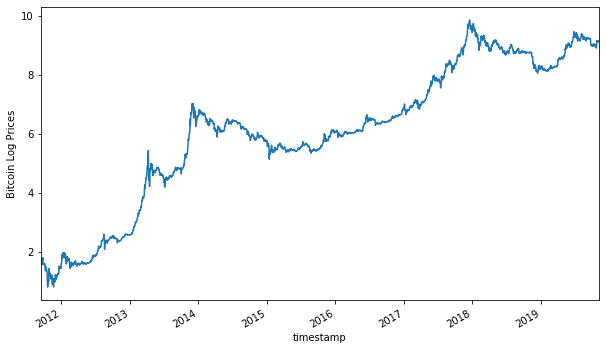

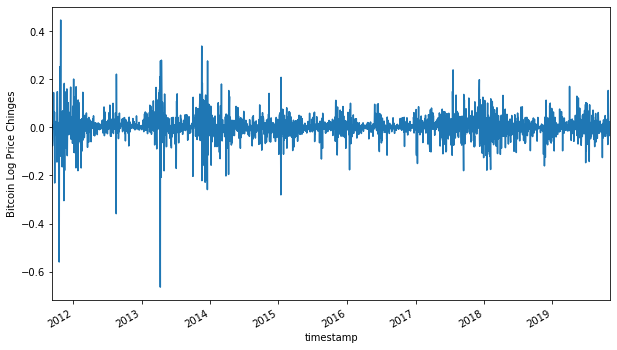

In [6]:
# Plot Log prices

plt.figure(figsize=(10,  6)) 
plt.ylabel("Bitcoin Log Prices")
df['log close'].plot()

plt.figure(figsize=(10,  6)) 
plt.ylabel("Bitcoin Log Price Chinges")
df['log return'].plot()

In [7]:
# Descriptive Statistics for Log Prices

print("Log Prices\n")
print("Mean     ",df['log close'].mean())
print("Median   ",df['log close'].median())
print("Skewness ",df['log close'].skew())
print("Kurtosis ",df['log close'].kurt())

print("\nLog Price Differences\n")
print("Mean     ",df['log return'].mean())
print("Median   ",df['log return'].median())
print("Skewness ",df['log return'].skew())
print("Kurtosis ",df['log return'].kurt())

Log Prices

Mean      6.101435555486407
Median    6.238676125755892
Skewness  -0.5232480788213172
Kurtosis  -0.5725296114372869

Log Price Differences

Mean      0.002490337456614929
Median    0.0020020026706728533
Skewness  -1.2457321616430832
Kurtosis  23.806023897715292


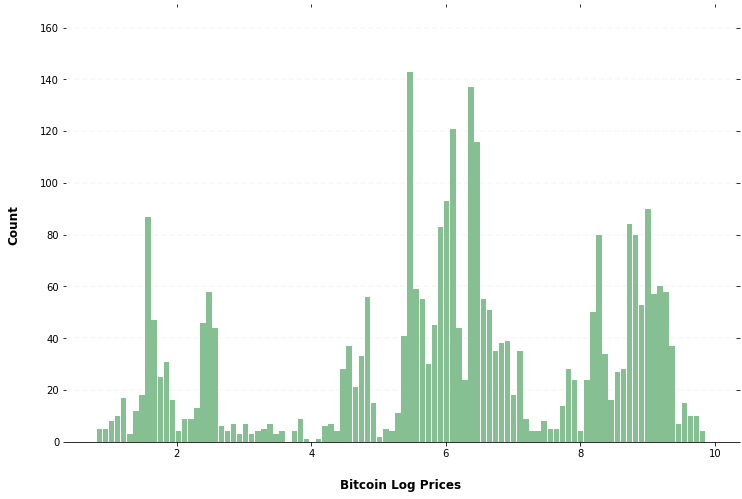

In [8]:
# Print Distribution of Log Prices

ax = df.hist(column='log close', bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Bitcoin Log Prices", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

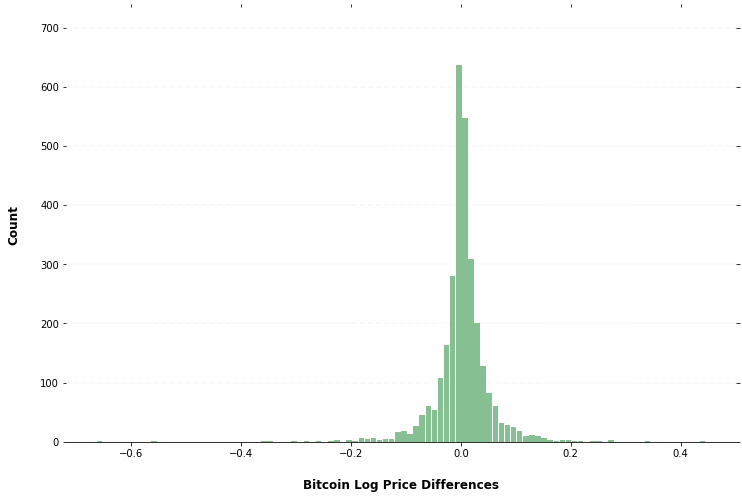

In [9]:
# Print Distribution of Log Prices

ax = df.hist(column='log return', bins=100, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Bitcoin Log Price Differences", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

In [10]:
### Drop Close and LogDiff

df.drop(['close',  'log return'],  axis=1,  inplace=True) 
df.head(10)

,log close
timestamp,
2011-09-14,1.710188
2011-09-15,1.635106
2011-09-16,1.578979
2011-09-17,1.583094
2011-09-18,1.593309
2011-09-19,1.589235
2011-09-20,1.733424
2011-09-21,1.742698
2011-09-22,1.743969


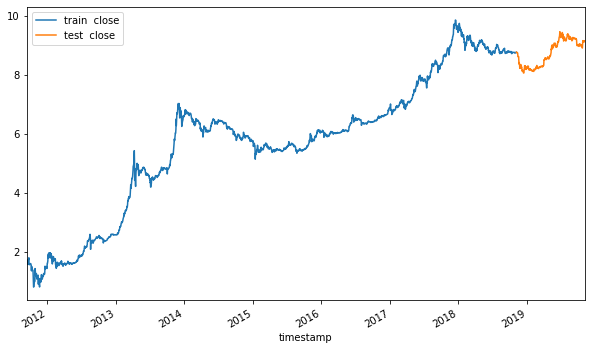

In [11]:
### Split into Train and Test datasets

test_split  =  pd.Timestamp('2018-11-06') 
df  =  df['log close']
train_close = df.loc[:test_split] 
test_close = df.loc[test_split:] 
plt.figure(figsize=(10,  6))
axis = train_close.plot() 
test_close.plot(ax=axis) 
plt.legend(['train  close',  'test  close'])

In [12]:
print("Train Start Date:",train_close.index.min())
print("Train End Date:",train_close.index.max())
print("Train Observations:",len(train_close),"\n")
print("Test Start Date:",test_close.index.min())
print("Test End Date:",test_close.index.max())
print("Test Observations:",len(test_close))

Train Start Date: 2011-09-14 00:00:00
Train End Date: 2018-11-06 00:00:00
Train Observations: 2590 

Test Start Date: 2018-11-06 00:00:00
Test End Date: 2019-11-06 00:00:00
Test Observations: 366


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler  =  MinMaxScaler(feature_range=(-1,  1)) 
train_close_scaled = scaler.fit_transform(train_close.values.reshape(-1, 1)) 
test_close_scaled = scaler.transform(test_close.values.reshape(-1, 1))

In [14]:
import numpy as np

def split_data(dataset, steps): 
    X, Y = [], []
    for i in range(len(dataset)-steps): 
        x = dataset[i:i+steps] 
        X.append(x)
        y = dataset[i+steps] 
        Y.append(y)
    return np.array(X), np.array(Y)


In [15]:
n_steps = 30

X_train, y_train = split_data(train_close_scaled, n_steps)  
X_test, y_test = split_data(test_close_scaled, n_steps)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [16]:
from  keras.models  import  Sequential
from keras.layers import Dense, LSTM


rnn = Sequential() 
rnn.add(LSTM(units=7,
            input_shape=(X_train.shape[1], X_train.shape[2]), 
            activation='relu', 
            kernel_initializer='lecun_uniform', 
            return_sequences=False))
rnn.add(Dense(units=1)) 
rnn.compile(loss='logcosh',  optimizer='nadam')

Using TensorFlow backend.


In [17]:
rnn_history = rnn.fit(x=X_train,
                      y=y_train, 
                      epochs=100,
                      batch_size=1,
                      verbose=1,
                      shuffle=False)

Epoch 1/100
2560/2560 [==============================] - 25s 10ms/step - loss: 0.0068
Epoch 2/100
2560/2560 [==============================] - 25s 10ms/step - loss: 7.8524e-04
Epoch 3/100
2560/2560 [==============================] - 26s 10ms/step - loss: 2.4180e-04
Epoch 4/100
2560/2560 [==============================] - 28s 11ms/step - loss: 2.4135e-04
Epoch 5/100
2560/2560 [==============================] - 26s 10ms/step - loss: 2.3463e-04
Epoch 6/100
2560/2560 [==============================] - 27s 10ms/step - loss: 2.3411e-04
Epoch 7/100
2560/2560 [==============================] - 25s 10ms/step - loss: 2.6724e-04
Epoch 8/100
2560/2560 [==============================] - 28s 11ms/step - loss: 2.3884e-04
Epoch 9/100
2560/2560 [==============================] - 36s 14ms/step - loss: 2.1732e-04
Epoch 10/100
2560/2560 [==============================] - 32s 13ms/step - loss: 1.3478e-04
Epoch 11/100
2560/2560 [==============================] - 26s 10ms/step - loss: 1.4626e-04
Epoch 12/100

2560/2560 [==============================] - 25s 10ms/step - loss: 9.6554e-05
Epoch 92/100
2560/2560 [==============================] - 26s 10ms/step - loss: 9.5265e-05
Epoch 93/100
2560/2560 [==============================] - 25s 10ms/step - loss: 9.3734e-05
Epoch 94/100
2560/2560 [==============================] - 26s 10ms/step - loss: 9.1443e-05
Epoch 95/100
2560/2560 [==============================] - 26s 10ms/step - loss: 9.1047e-05
Epoch 96/100
2560/2560 [==============================] - 26s 10ms/step - loss: 8.9781e-05
Epoch 97/100
2560/2560 [==============================] - 27s 11ms/step - loss: 8.9591e-05
Epoch 98/100
2560/2560 [==============================] - 26s 10ms/step - loss: 9.0978e-05
Epoch 99/100
2560/2560 [==============================] - 25s 10ms/step - loss: 9.0203e-05
Epoch 100/100
2560/2560 [==============================] - 25s 10ms/step - loss: 9.0256e-05


In [18]:
from sklearn.metrics import r2_score

y_train_pred_rnn = rnn.predict(X_train) 
y_pred_test_rnn = rnn.predict(X_test)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train,y_train_pred_rnn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test,y_pred_test_rnn)))

The R2 score on the Train set is:	0.972
The R2 score on the Test set is:	0.839


In [19]:
### Calculate RMSE

trainRMSE =  np.sqrt(((y_train_pred_rnn - y_train) ** 2).mean())
print("The RMSE on the Train set is:\t{:0.5f}".format(trainRMSE))

testRMSE =  np.sqrt(((y_pred_test_rnn - y_test) ** 2).mean())
print("The RMSE on the Test set is:\t{:0.5f}".format(testRMSE))

The RMSE on the Train set is:	0.08168
The RMSE on the Test set is:	0.03973


In [20]:
rnn_test  =  rnn.evaluate(X_test,  y_test,  batch_size=1) 
print("RNN: {}".format(rnn_test))

336/336 [==============================] - 1s 3ms/step
RNN: 0.0007888437027022952


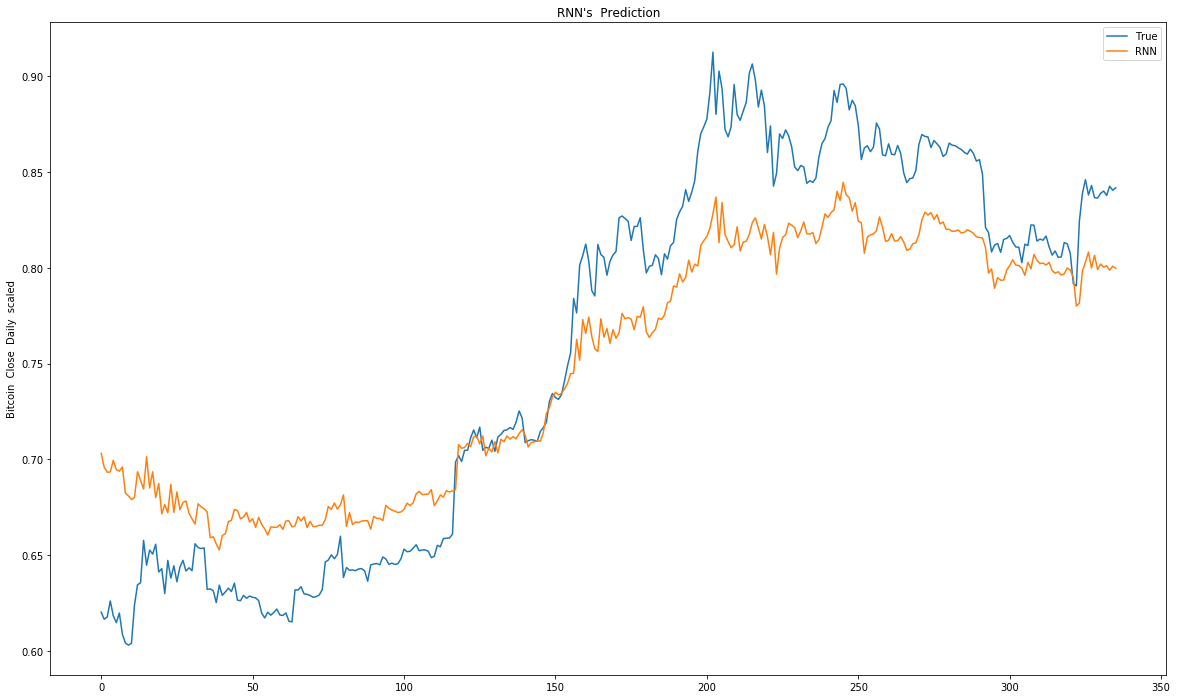

In [21]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,  12)) 
plt.plot(y_test,  label='True') 
plt.plot(y_pred_test_rnn,  label='RNN') 
plt.title("RNN's  Prediction") 
plt.ylabel('Bitcoin  Close  Daily  scaled') 
plt.legend()
plt.show()